In [1]:
import numpy as np
import json
import string
import dateutil.parser
from bs4 import BeautifulSoup

events_file_name = "../datasets/events1.json"

categories = [
    'music',
    'food',
    'entertainment',
    'nightlife',
    'theatre',
    'arts',
    'sports',
    'outdoors',
    'conferences',
    'courses',
    'charity',
#     'other_stuff',
    'attraction',
    'exhibition',
    'talks',
]

def cleanup_text(text):
    new_text = text.lower()
    new_text = BeautifulSoup(text, "lxml").get_text()
    new_text = ''.join(c for c in new_text if c not in string.punctuation)
    new_text = ''.join(c for c in new_text if c not in '0123456789')
    new_text = ' '.join(new_text.split())
    return new_text

def get_yday(date):
    return date.timetuple().tm_yday

events = []
with open(events_file_name, 'r') as reader:
    for line in reader:
        event = json.loads(line, encoding = 'utf-8')
        category = event['category']
        created_at = dateutil.parser.parse(event['created_at'])
        starts_at = dateutil.parser.parse(event['starts_at'])
        ends_at = dateutil.parser.parse(event['ends_at'])
        tt_prices = [float(tt['price']) for tt in event['ticket_types_info']]
        tt_quantities = [float(tt['quantity']) for tt in event['ticket_types_info']]
        tt_types = [tt['type'] for tt in event['ticket_types_info']]
        
        if category in categories and event['state'] != 'draft':
            events.append({
                'description': cleanup_text(event['description']),
                'category': categories.index(event['category']),
                'seating_enabled': event['seating_enabled'],
                'public': event['public'],
                'seats': event['seats'],
                'created_at_yday': get_yday(created_at),
                'created_at_wday': created_at.weekday(),
                'starts_at_yday': get_yday(starts_at),
                'starts_at_wday': starts_at.weekday(),
                'ends_at_yday': get_yday(ends_at),
                'ends_at_wday': ends_at.weekday(),
                'max_tt_price': (0.0 if tt_prices == [] else np.max(tt_prices)),
                'min_tt_price': (0.0 if tt_prices == [] else np.min(tt_prices)),
                'avg_tt_price': (0.0 if tt_prices == [] else np.mean(tt_prices)),
                'sum_quantities': np.sum(tt_quantities),
                'days_span': (ends_at - starts_at).days,
                'ticket_types_count': len(tt_types),
                'pay_ticket_types_count': np.sum([typ == 'PayTicketType' for typ in tt_types]),
                'free_ticket_types_count': np.sum([typ == 'FreeTicketType' for typ in tt_types]),
                'attendance_ticket_types_count': np.sum([typ == 'AttendanceTicketType' for typ in tt_types]),
                'donation_ticket_types_count': np.sum([typ == 'DonationTicketType' for typ in tt_types]),
            })
            
        if len(events) > 10000:
            break

print('Done.')

Done.


In [418]:
# How to represent cyclic input?
#   For example, how to represent that 31.21 is close to 01.01? Or we should leave it to NN?

In [3]:
raw_texts = [e['description'] for e in events]

In [25]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# nltk.download() # needs 'punkt' package

max_features = 500

def tokenizer(text):
    words = nltk.word_tokenize(text)
    return words

# Create TF-IDF of texts
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words=None, max_features=max_features)
sparse_tfidf_texts = tfidf.fit_transform(raw_texts)

In [26]:
attr_public = np.nan_to_num(np.array([e['public'] for e in events], dtype=np.float32)).reshape(-1, 1)

attr_seating_enabled = np.array([e['seating_enabled'] for e in events], dtype = np.float32).reshape(-1, 1)

attr_seats = np.nan_to_num(np.ma.log(np.array([e['seats'] for e in events], dtype = np.float32))).filled(0).reshape(-1, 1)
if np.max(attr_seats) > 0.0:
    attr_seats = attr_seats / np.max(attr_seats)

attr_created_at_yday = np.array([e['created_at_yday'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_created_at_yday = attr_created_at_yday / np.max(attr_created_at_yday)

attr_created_at_wday = np.array([e['created_at_wday'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_created_at_wday = attr_created_at_wday / np.max(attr_created_at_wday)

attr_starts_at_yday = np.array([e['starts_at_yday'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_starts_at_yday = attr_starts_at_yday / np.max(attr_starts_at_yday)

attr_starts_at_wday = np.array([e['starts_at_wday'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_starts_at_wday = attr_starts_at_wday / np.max(attr_starts_at_wday)

attr_ends_at_yday = np.array([e['ends_at_yday'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_ends_at_yday = attr_ends_at_yday / np.max(attr_ends_at_yday)

attr_ends_at_wday = np.array([e['ends_at_wday'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_ends_at_wday = attr_ends_at_wday / np.max(attr_ends_at_wday)

attr_max_tt_price = np.array([e['max_tt_price'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_max_tt_price = attr_max_tt_price / np.max(attr_max_tt_price)

attr_min_tt_price = np.array([e['min_tt_price'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_min_tt_price = attr_min_tt_price / np.max(attr_min_tt_price)

attr_avg_tt_price = np.array([e['avg_tt_price'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_avg_tt_price = attr_avg_tt_price / np.max(attr_avg_tt_price)

attr_sum_quantities = np.array([e['sum_quantities'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_sum_quantities = attr_sum_quantities / np.max(attr_sum_quantities)

attr_days_span = np.array([e['days_span'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_days_span = attr_days_span / np.max(attr_days_span)

attr_ticket_types_count = np.array([e['ticket_types_count'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_ticket_types_count = attr_ticket_types_count / np.max(attr_ticket_types_count)

attr_pay_ticket_types_count = np.array([e['pay_ticket_types_count'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_pay_ticket_types_count = attr_pay_ticket_types_count / np.max(attr_pay_ticket_types_count)

attr_free_ticket_types_count = np.array([e['free_ticket_types_count'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_free_ticket_types_count = attr_free_ticket_types_count / np.max(attr_free_ticket_types_count)

attr_attendance_ticket_types_count = np.array([e['attendance_ticket_types_count'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_attendance_ticket_types_count = attr_attendance_ticket_types_count / np.max(attr_attendance_ticket_types_count)

attr_donation_ticket_types_count = np.array([e['donation_ticket_types_count'] for e in events], dtype = np.float32).reshape(-1, 1)
attr_donation_ticket_types_count = attr_donation_ticket_types_count / np.max(attr_donation_ticket_types_count)

In [27]:
features = np.hstack([
    sparse_tfidf_texts.todense(),
    np.nan_to_num(attr_public),
    attr_seating_enabled,
    attr_seats,
    attr_created_at_yday,
    attr_created_at_wday,
    attr_starts_at_yday,
    attr_starts_at_wday,
    attr_ends_at_yday,
    attr_ends_at_wday,
    attr_max_tt_price,
    attr_min_tt_price,
    attr_avg_tt_price,
    attr_sum_quantities,
    attr_days_span,
    attr_ticket_types_count,
    attr_pay_ticket_types_count,
    attr_free_ticket_types_count,
    attr_attendance_ticket_types_count,
    attr_donation_ticket_types_count,
])
print(features.shape)

target = np.array([e['category'] for e in events])
print(target.shape)

np.sum(features)

(10001, 519)
(10001,)


89298.943336961092

In [28]:
import numpy as np

num_samples, num_features = features.shape

train_indices = np.random.choice(num_samples, int(0.8*num_samples), replace=False)
test_indices = np.array(list(set(range(num_samples)) - set(train_indices)))

features_train = features[train_indices]
features_test = features[test_indices]

target_train = np.array([x for ix, x in enumerate(target) if ix in train_indices])
target_test = np.array([x for ix, x in enumerate(target) if ix in test_indices])

In [34]:
import tensorflow as tf
import time
import os.path
import math
from tensorflow.python.framework import ops
ops.reset_default_graph()   

NUM_CLASSES = len(categories)
batch_size = 200
num_hidden1 = 500

log_dir = "./log"

if tf.gfile.Exists(log_dir):
    tf.gfile.DeleteRecursively(log_dir)
tf.gfile.MakeDirs(log_dir)

with tf.Graph().as_default():
    x_data = tf.placeholder(shape=[None, num_features], dtype=tf.float32)
    y_target = tf.placeholder(tf.int32, shape=(None))

    with tf.name_scope('hidden1'):
        weights1 = tf.Variable(
            tf.truncated_normal([num_features, num_hidden1],
                            stddev=1.0 / math.sqrt(float(num_features))),
                            name='weights')
        biases1 = tf.Variable(tf.zeros([num_hidden1]),
                             name='biases')
        hidden1 = tf.matmul(x_data, weights1) + biases1

    with tf.name_scope('softmax_linear'):
        weights_sm = tf.Variable(
            tf.truncated_normal([num_hidden1, NUM_CLASSES],
                            stddev=1.0 / math.sqrt(float(num_hidden1))),
                            name='weights')
        biases_sm = tf.Variable(tf.zeros([NUM_CLASSES]),
                             name='biases')
        logits = tf.matmul(hidden1, weights_sm) + biases_sm

    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y_target,
        logits=logits,
        name='xentropy')
    loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')

    tf.summary.scalar('loss', loss)
    
    optimizer = tf.train.GradientDescentOptimizer(0.0025)
    global_step = tf.Variable(0, name='global_step', trainable=False)
    train_op = optimizer.minimize(loss, global_step=global_step)

    prediction = tf.nn.in_top_k(logits, y_target, 1)
    predictions_correct = tf.cast(prediction, tf.float32)
    accuracy = tf.reduce_mean(predictions_correct)
    
    tf.summary.scalar('accuracy', accuracy)

    summary = tf.summary.merge_all()
    
    # Create a saver for writing training checkpoints.
    saver = tf.train.Saver()
    
    sess = tf.Session()
    
    # Instantiate a SummaryWriter to output summaries and the Graph.
    summary_writer = tf.summary.FileWriter(log_dir, sess.graph)
    
    init = tf.global_variables_initializer()

    sess.run(init)

    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []
    i_data = []
    for i in range(3000):
        rand_index = np.random.choice(features_train.shape[0], size=batch_size)
        rand_x = features_train[rand_index]
        rand_y = np.transpose([target_train[rand_index]]).ravel()
        feed_dict = {
            x_data: rand_x,
            y_target: rand_y
        }
        
        start_time = time.time()

        sess.run([train_op, loss], feed_dict=feed_dict)
        
        duration = time.time() - start_time

        # Only record loss and accuracy every 100 generations
        if (i+1)%100==0:
            i_data.append(i+1)

            feed_dict_test = {
                x_data: features_test,
                y_target: np.transpose([target_test]).ravel(),
            }

            train_loss_temp = sess.run(loss, feed_dict=feed_dict)
            train_loss.append(train_loss_temp)

            test_loss_temp = sess.run(loss, feed_dict=feed_dict_test)
            test_loss.append(test_loss_temp)

            train_acc_temp = sess.run(accuracy, feed_dict=feed_dict)
            train_acc.append(train_acc_temp)

            test_acc_temp = sess.run(accuracy, feed_dict=feed_dict_test)
            test_acc.append(test_acc_temp)
            
            summary_str = sess.run(summary, feed_dict=feed_dict)
            summary_writer.add_summary(summary_str, i)
            summary_writer.flush()

        if (i+1)%500==0:
            acc_and_loss = [i+1, train_loss_temp, test_loss_temp, train_acc_temp, test_acc_temp]
            acc_and_loss = [np.round(x,2) for x in acc_and_loss]
            print('Generation # {}. Train Loss (Test Loss): {:.2f} ({:.2f}). Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))
            checkpoint_file = os.path.join(log_dir, 'model.ckpt')
            saver.save(sess, checkpoint_file, global_step=i)

print("Done.")

Generation # 500. Train Loss (Test Loss): 2.45 (2.39). Train Acc (Test Acc): 0.18 (0.24)
Generation # 1000. Train Loss (Test Loss): 2.30 (2.32). Train Acc (Test Acc): 0.25 (0.24)
Generation # 1500. Train Loss (Test Loss): 2.28 (2.29). Train Acc (Test Acc): 0.28 (0.24)
Generation # 2000. Train Loss (Test Loss): 2.24 (2.28). Train Acc (Test Acc): 0.28 (0.24)
Generation # 2500. Train Loss (Test Loss): 2.27 (2.27). Train Acc (Test Acc): 0.28 (0.24)
Generation # 3000. Train Loss (Test Loss): 2.27 (2.27). Train Acc (Test Acc): 0.24 (0.24)
Done.


Populating the interactive namespace from numpy and matplotlib


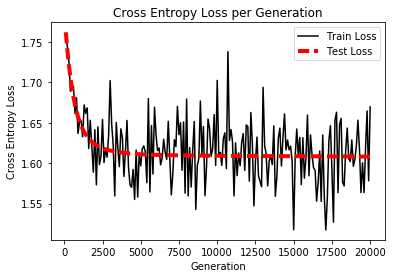

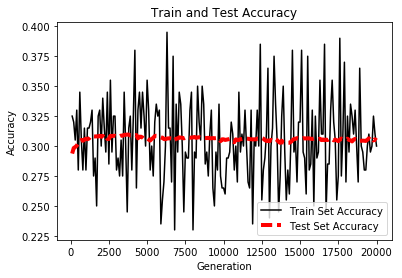

In [339]:
# %pylab inline

# # Plot loss over time
# plt.plot(i_data, train_loss, 'k-', label='Train Loss')
# plt.plot(i_data, test_loss, 'r--', label='Test Loss', linewidth=4)
# plt.title('Cross Entropy Loss per Generation')
# plt.xlabel('Generation')
# plt.ylabel('Cross Entropy Loss')
# plt.legend(loc='upper right')
# plt.show()

# # Plot train and test accuracy
# plt.plot(i_data, train_acc, 'k-', label='Train Set Accuracy')
# plt.plot(i_data, test_acc, 'r--', label='Test Set Accuracy', linewidth=4)
# plt.title('Train and Test Accuracy')
# plt.xlabel('Generation')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.show()